In [1]:
import sys

import matplotlib.pyplot as plt
import networkx as nx

In [98]:
import numpy as np
import random

In [102]:
file_path = "./data/gc_8_1"
f = open(file_path, "r")
data = f.read()
sdata = data
data = data.split("\n")
f.close()

In [103]:
n, m = map(int, data[0].split(' '))
G = nx.Graph()
mapping = dict(zip(range(n), range(n)))
G = nx.relabel_nodes(G, mapping)
for i in range(1, len(data) - 1):
    chunk = data[i]
    n, m = map(int, chunk.split(' '))
    #print(n, m)
    G.add_edge(n, m)

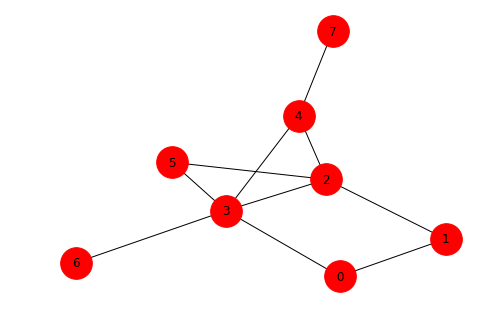

In [104]:
#nx.write_adjlist(G, sys.stdout.buffer)  # write adjacency list to the output
nx.draw(G, with_labels = True, node_size=1000)
plt.show()

In [80]:
import solver # main solver file with optimization methods

In [105]:
f = open(file_path, "r")
gdata = f.read()
optimizer_result = solver.solve_it(gdata)

In [106]:
print(optimizer_result)

3 0
0 1 0 1 2 2 0 0


In [107]:
def refine_colors(solver_out):
    cols = solver_out.split("\n")[1]
    return list(map(int, cols.split(" ")))

In [124]:
def get_assigned_colors(cnodes):
    n = len(cnodes)
    colors = np.zeros((n, 3))
    color_map = np.zeros((n, 3))
    delta = 1. / n
    #for i in range(n):
    #    color_map[i, 0] = 1. * i / (n * n)
    #    color_map[i, 1] = np.random.rand(1)
    #    color_map[i, 2] = np.random.rand(1)
    for i in range(n):
        color_map[i] = (np.random.rand(3,1)).reshape(3)
    for i in range(n):
        colors[i] = color_map[cnodes[i]]
    return colors

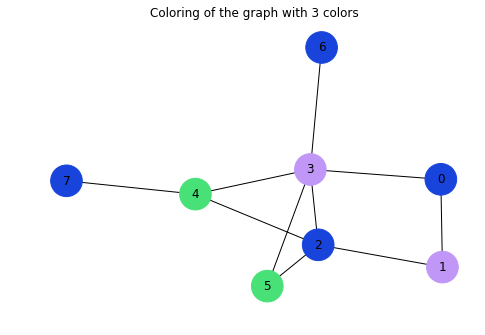

In [127]:
assigned = refine_colors(optimizer_result) 
colors = get_assigned_colors(assigned)
nx.draw(G,node_color = colors,with_labels = True, node_size=1000)
plt.title("Coloring of the graph with " + str(max(optimizer_result)) + " colors")
plt.show()